**Online news article data- III- Four classes**

In [ ]:
import pandas as AAD

ON_NeWs_ATL_I = AAD.read_csv('ON_NeWs_ATL_III.csv')
ON_NeWs_ATL_I

,Class Index,Description
0,3,reuter short seller wall street dwindl band ul...
1,3,reuter privat invest firm carlyl group reput m...
2,3,reuter soar crude price plu worri economi outl...
3,3,reuter author halt oil export flow main pipeli...
4,3,afp tearaway world oil price toppl record stra...
...,...,...
126286,1,ukrainian presidenti candid viktor yushchenko ...
126287,2,suppli attract pitch option dwindl daili lost ...
126288,2,like roger clemen almost exactli eight year ea...
126289,3,singapor doctor unit state warn painkil bextra...


In [ ]:
import warnings as DDD
DDD.filterwarnings("ignore")

In [ ]:
ON_NeWs_ATL_I['Class Index'].value_counts()

2    31717
1    31647
3    31507
4    31420
Name: Class Index, dtype: int64

* Four classes in output category

 1-World, 2-Sports, 3-Business, 4-Sci/Tech

In [ ]:
o_ON_NeWs_ATL= ON_NeWs_ATL_I['Class Index']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CCV

CCV_L = CCV(analyzer='char')
i_ON_NeWs_ATL = CCV_L.fit_transform(ON_NeWs_ATL_I['Description'].values.astype('U')).toarray()
i_ON_NeWs_ATL

array([[10,  3,  1, ...,  0,  1,  0],
       [20,  9,  1, ...,  0,  2,  0],
       [17,  4,  0, ...,  2,  0,  0],
       ...,
       [17, 11,  1, ...,  2,  2,  1],
       [13, 10,  4, ...,  2,  1,  0],
       [14, 10,  3, ...,  1,  2,  0]])

In [ ]:
from sklearn.model_selection import train_test_split as LLR

ir_ON_NeWs_ATL, is_ON_NeWs_ATL, or_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(i_ON_NeWs_ATL, o_ON_NeWs_ATL, test_size= 0.4, random_state= 223)
iv_ON_NeWs_ATL, is_ON_NeWs_ATL, ov_ON_NeWs_ATL, os_ON_NeWs_ATL = LLR(is_ON_NeWs_ATL, os_ON_NeWs_ATL, test_size= 0.5, random_state= 223)

In [ ]:
ir_ON_NeWs_ATL.shape #      train

(75774, 27)

In [ ]:
iv_ON_NeWs_ATL.shape #          Validation

(25258, 27)

In [ ]:
is_ON_NeWs_ATL.shape #      test

(25259, 27)

## **Machine Learning Algorithms**

In [ ]:
from sklearn.metrics import classification_report as Mteric1
from sklearn.metrics import confusion_matrix as Mteric2
from sklearn.metrics import ConfusionMatrixDisplay as Mteric3
import time as Mteric4
from sklearn.model_selection import GridSearchCV as GGR

**Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression as Mteric5

ONA_K = {'penalty': ['l1', 'l2', 'elasticnet', None],
            'multi_class': ['auto', 'ovr', 'multinomial']}

ONA_KM = Mteric5(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'multi_class': 'auto', 'penalty': None}
0.482


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric5(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 4.371055841445923


LogisticRegression(penalty=None)

              precision    recall  f1-score   support

           1       0.50      0.54      0.52      6241
           2       0.50      0.51      0.50      6352
           3       0.46      0.40      0.43      6296
           4       0.50      0.52      0.51      6369

    accuracy                           0.49     25258
   macro avg       0.49      0.49      0.49     25258
weighted avg       0.49      0.49      0.49     25258

time-dur-validating = 0.2558419704437256


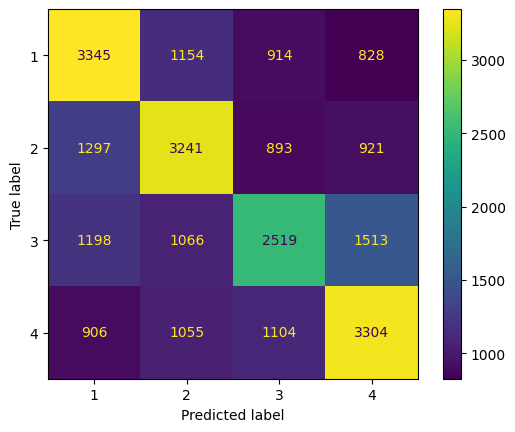

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.52      0.55      0.53      6371
           2       0.50      0.51      0.51      6274
           3       0.48      0.41      0.44      6310
           4       0.50      0.53      0.51      6304

    accuracy                           0.50     25259
   macro avg       0.50      0.50      0.50     25259
weighted avg       0.50      0.50      0.50     25259

time-dur-testing = 0.2069230079650879


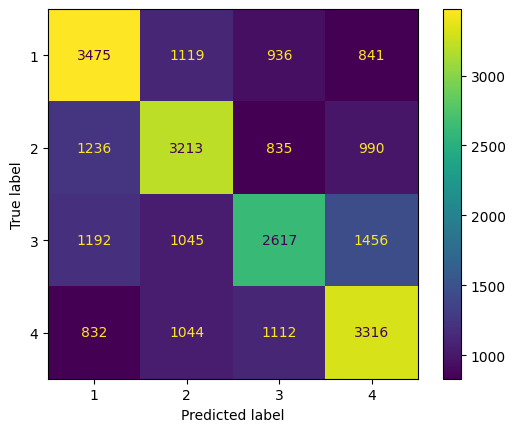

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**SVM**


In [ ]:
from sklearn.svm import SVC as Mteric6

ONA_K = {'max_iter': [1, -1, 2, 3],
            'decision_function_shape': ['ovo', 'ovr'],
         'kernel': ['sigmpid', 'poly', 'rbf']}

ONA_KM = Mteric6(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'decision_function_shape': 'ovo', 'kernel': 'rbf', 'max_iter': -1}
0.4914


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric6(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL[:10000], or_ON_NeWs_ATL[:10000])

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 10.214604377746582


SVC(decision_function_shape='ovo')

              precision    recall  f1-score   support

           1       0.52      0.53      0.52      6241
           2       0.50      0.57      0.53      6352
           3       0.51      0.41      0.45      6296
           4       0.52      0.55      0.53      6369

    accuracy                           0.51     25258
   macro avg       0.51      0.51      0.51     25258
weighted avg       0.51      0.51      0.51     25258

time-dur-validating = 21.741639852523804


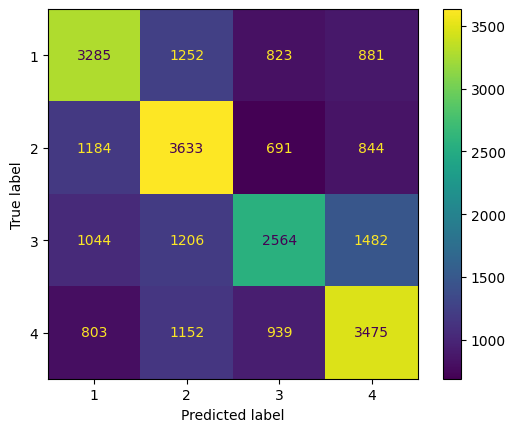

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.54      0.53      0.53      6371
           2       0.51      0.58      0.54      6274
           3       0.51      0.41      0.46      6310
           4       0.52      0.55      0.53      6304

    accuracy                           0.52     25259
   macro avg       0.52      0.52      0.52     25259
weighted avg       0.52      0.52      0.52     25259

time-dur-testing = 21.09449315071106


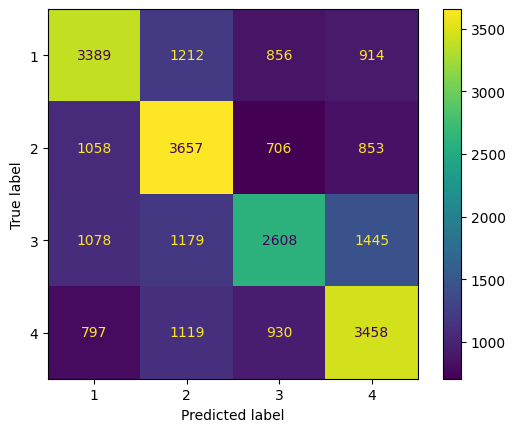

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Decision Tree**


In [ ]:
from sklearn.tree import DecisionTreeClassifier as Mteric7

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric7(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'gini', 'max_features': 'log2'}
0.33840000000000003


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric7(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 0.24211907386779785


DecisionTreeClassifier(max_features='log2')

              precision    recall  f1-score   support

           1       0.38      0.38      0.38      6241
           2       0.38      0.37      0.38      6352
           3       0.36      0.37      0.37      6296
           4       0.38      0.37      0.37      6369

    accuracy                           0.37     25258
   macro avg       0.37      0.37      0.37     25258
weighted avg       0.37      0.37      0.37     25258

time-dur-validating = 0.14782118797302246


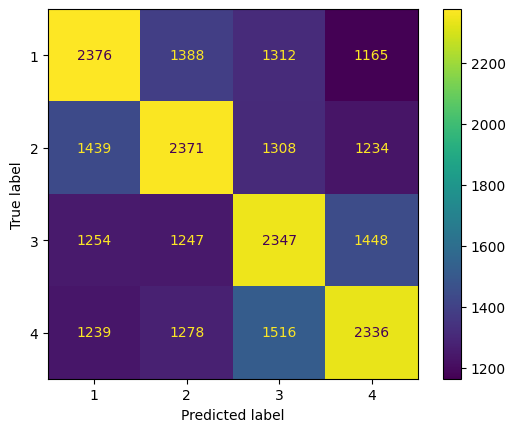

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.38      0.39      0.39      6371
           2       0.37      0.36      0.36      6274
           3       0.36      0.37      0.36      6310
           4       0.38      0.37      0.38      6304

    accuracy                           0.37     25259
   macro avg       0.37      0.37      0.37     25259
weighted avg       0.37      0.37      0.37     25259

time-dur-testing = 0.15154361724853516


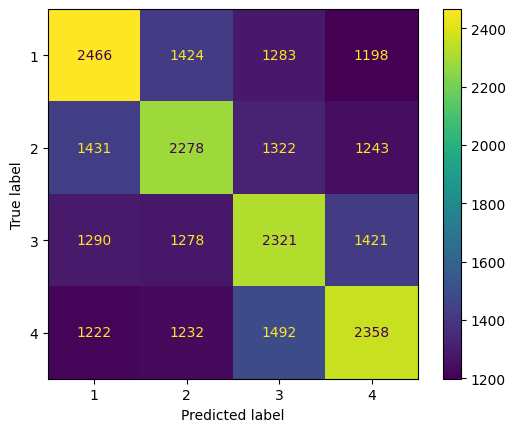

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Random Forest**


In [ ]:
from sklearn.ensemble import RandomForestClassifier as Mteric8

ONA_K = {'criterion': ['gini', 'entropy', 'log_loss'],
            'max_features': ['auto', 'sqrt', 'log2']}

ONA_KM = Mteric8(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'gini', 'max_features': 'auto'}
0.4718


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric8(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 23.434844970703125


RandomForestClassifier(max_features='auto')

              precision    recall  f1-score   support

           1       0.54      0.55      0.55      6241
           2       0.52      0.60      0.55      6352
           3       0.54      0.46      0.49      6296
           4       0.54      0.54      0.54      6369

    accuracy                           0.53     25258
   macro avg       0.54      0.53      0.53     25258
weighted avg       0.54      0.53      0.53     25258

time-dur-validating = 1.6284735202789307


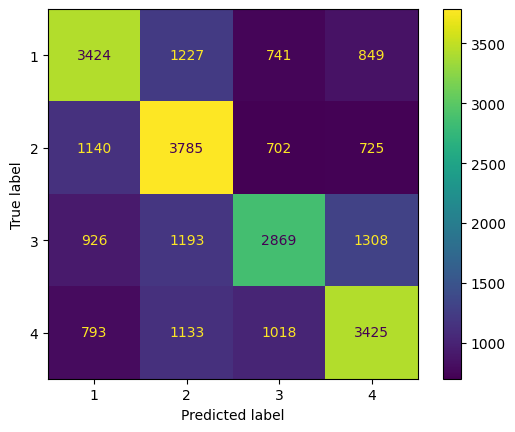

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.55      0.55      0.55      6371
           2       0.52      0.60      0.56      6274
           3       0.53      0.45      0.49      6310
           4       0.54      0.54      0.54      6304

    accuracy                           0.54     25259
   macro avg       0.54      0.54      0.54     25259
weighted avg       0.54      0.54      0.54     25259

time-dur-testing = 1.457066535949707


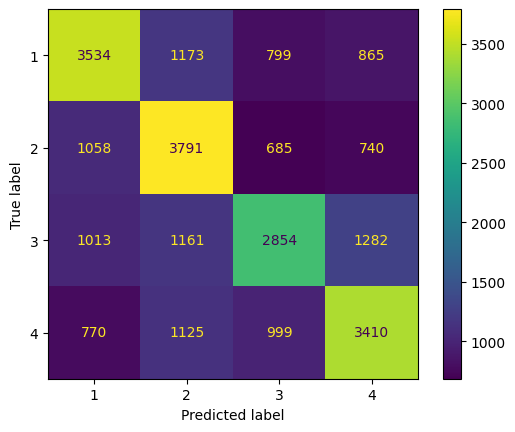

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as Mteric9

ONA_K = {'criterion': ['friedman_mse', 'squared_error'],
            'max_features': ['sqrt', 'log2']}

ONA_KM = Mteric9(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'criterion': 'friedman_mse', 'max_features': 'sqrt'}
0.48319999999999996


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric9(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 36.701348066329956


GradientBoostingClassifier(max_features='sqrt')

              precision    recall  f1-score   support

           1       0.53      0.50      0.51      6241
           2       0.49      0.57      0.53      6352
           3       0.50      0.42      0.46      6296
           4       0.51      0.52      0.52      6369

    accuracy                           0.51     25258
   macro avg       0.51      0.51      0.50     25258
weighted avg       0.51      0.51      0.50     25258

time-dur-validating = 0.6088967323303223


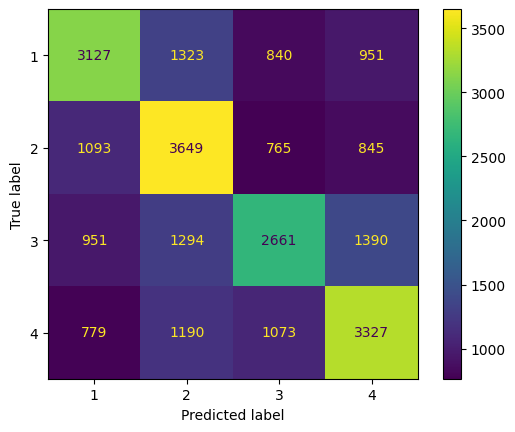

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.53      0.52      0.53      6371
           2       0.50      0.58      0.54      6274
           3       0.50      0.42      0.46      6310
           4       0.51      0.53      0.52      6304

    accuracy                           0.51     25259
   macro avg       0.51      0.51      0.51     25259
weighted avg       0.51      0.51      0.51     25259

time-dur-testing = 0.38542938232421875


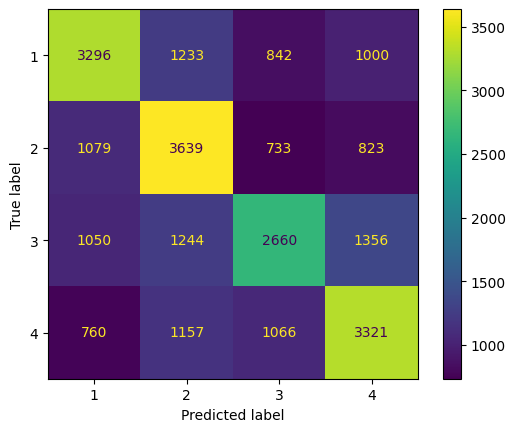

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)

## **Neural Network Algorithms**

**Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier as Mteric10

ONA_K = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
            'solver': ['adam','lbfgs', 'sgd']}

ONA_KM = Mteric10(random_state= 223)
ONA_KM = GGR(ONA_KM, ONA_K, cv=2 )
ONA_KM.fit(ir_ON_NeWs_ATL[:5000],or_ON_NeWs_ATL[:5000])

print(ONA_KM.best_params_)
print(ONA_KM.best_score_)

{'learning_rate': 'adaptive', 'solver': 'sgd'}
0.4738


In [ ]:
Mteric_s = Mteric4.time()

Mo_News = Mteric10(**ONA_KM.best_params_)
Mo_News.fit(ir_ON_NeWs_ATL, or_ON_NeWs_ATL)

Mteric_d = Mteric4.time()
print("time-dur-training =", Mteric_d- Mteric_s)
Mo_News

time-dur-training = 145.99385476112366


MLPClassifier(learning_rate='adaptive', solver='sgd')

              precision    recall  f1-score   support

           1       0.60      0.46      0.52      6241
           2       0.50      0.64      0.56      6352
           3       0.48      0.51      0.50      6296
           4       0.55      0.49      0.51      6369

    accuracy                           0.52     25258
   macro avg       0.53      0.52      0.52     25258
weighted avg       0.53      0.52      0.52     25258

time-dur-validating = 0.26191043853759766


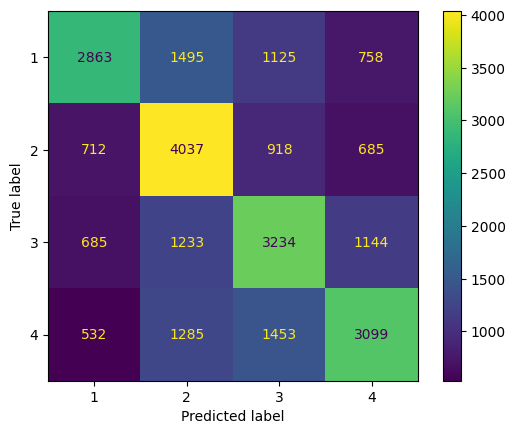

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(iv_ON_NeWs_ATL)
print(Mteric1(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(ov_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-validating =", Mteric_d- Mteric_s)

              precision    recall  f1-score   support

           1       0.62      0.46      0.53      6371
           2       0.51      0.64      0.57      6274
           3       0.49      0.53      0.51      6310
           4       0.55      0.50      0.52      6304

    accuracy                           0.53     25259
   macro avg       0.54      0.53      0.53     25259
weighted avg       0.54      0.53      0.53     25259

time-dur-testing = 0.23255705833435059


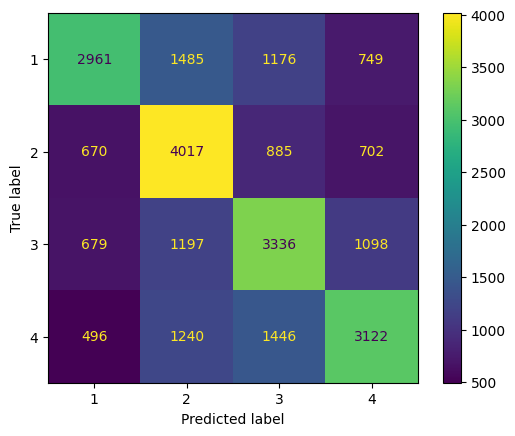

In [ ]:
Mteric_s = Mteric4.time()

pe_ON_NeWs_ATL = Mo_News.predict(is_ON_NeWs_ATL)
print(Mteric1(os_ON_NeWs_ATL,pe_ON_NeWs_ATL))
L = Mteric2(os_ON_NeWs_ATL,pe_ON_NeWs_ATL)
D = Mteric3(confusion_matrix = L, display_labels = [1, 2, 3, 4])
D.plot()

Mteric_d = Mteric4.time()
print("time-dur-testing =", Mteric_d- Mteric_s)